<hr style="height:3px;border:none;color:#333;background-color:#333;" />
<img style=" float:right; display:inline" src="http://opencloud.utsa.edu/wp-content/themes/utsa-oci/images/logo.png"/>

### **University of Texas at San Antonio** 
<br/>
<br/>
<span style="color:#000; font-family: 'Bebas Neue'; font-size: 2.5em;"> **Open Cloud Institute** </span>

<hr style="height:3px;border:none;color:#333;background-color:#333;" />

### Machine Learning/BigData EE-6973-001-Fall-2016

<br/>
<span style="color:#000; font-family: 'Bebas Neue'; font-size: 1.5em;"> **Jonathan Lwowski** </span>  


<span style="color:#000; font-family: 'Bebas Neue'; font-size: 1.5em;"> **Prasanna Kolar** </span>
  

<hr style="height:1.5px;border:none;color:#333;background-color:#333;" />
<hr style="height:1.5px;border:none;color:#333;background-color:#333;" />

<span style="color:#000; font-family: 'Bebas Neue'; font-size: 2em;"> **Machine learning based people detector using UAVs** </span>  
<br/>
<br/>
<span style="color:#000; font-family: 'Bebas Neue'; font-size: 1.6em;"> Jonathan Lwowski, Prasanna Kolar </span>  
<span style="color:#000; font-family: 'Bebas Neue'; font-size: 1.4em;"> *Autonomous Controls Lab, University of Texas at San Antonio, San Antonio, Texas, USA* </span>  
<span style="color:#000; font-family: 'Bebas Neue'; font-size: 1.4em;"> {kyx930,vdd121}@my.utsa.edu </span>
<br/>
<br/>

<span style="color:#000; font-family: 'Bebas Neue'; font-size: 1.5em;"> **Dataset:** </span> <span style="color:#000; font-family: 'Bebas Neue'; font-size: 1.3em;"> The image data can be found in [http://www.gavrila.net/Datasets/Daimler_Pedestrian_Benchmark_D/Daimler_Mono_Ped__Class__Bench/daimler_mono_ped__class__bench.html] [1]. This dataset contains a collection of pedestrian and non-pedestrian images. The base data set contains a total of 4000 pedestrian and 5000 non-pedestrian samples cut out from video images and scaled to common size of 18x36 pixels. </span> 

<span style="color:#000; font-family: 'Bebas Neue'; font-size: 1.5em;"> **Outcome:** </span> <span style="color:#000; font-family: 'Bebas Neue'; font-size: 1.3em;"> Applying deep learning to identify people in a camera's image </span>

<span style="color:#000; font-family: 'Bebas Neue'; font-size: 1.5em;"> **Project Definition:** </span> <span style="color:#000; font-family: 'Bebas Neue'; font-size: 1.3em;"> Using deep neural network models, ResNet and Convnet, classification of camera images of faces of various people in various poses is sudied. The dataset includes images of 20 different people, approximately 32 images per person, varying the person's expression (happy, sad, angry, neutral), the direction in which they are looking (left, right, straight ahead, up), and whether or not they were wearing sunglassess. </span>

<span style="color:#000; font-family: 'Bebas Neue'; font-size: 1.3em;"> There is also variation in the background behind the person, the clothing worn by the person, and theposition of the person's face within the image. I total. 624 greyscale images were collected, each whithin a resolutoin of 120by128, with each image pixel described by a greyscale intensity value between 0 (black) and 255 (white).</span>


<span style="color:#000; font-family: 'Bebas Neue'; font-size: 1.3em;"> A variety of target function can be learn from this image data. For example, given an image as input we could train a model to output the identity of the person, the direction in which the person is facing, the gender of the person, whether or not they are wearning sunglasses, etc. All of this target functions can be learned to high accuracy from this image data. In this course research we consider the particular task: learning the direction in which the person is facing (to their left, right, straight ahead, or upward)[1]. </span>





<div style="width:830; background-color:white; height:220px; overflow:scroll; overflow-x: scroll;overflow-y: hidden;">

<img align="center" src="http://www.gavrila.net/Datasets/Daimler_Pedestrian_Benchmark_D/dc_ped_class_benchmark.gif"/>



</div>

[1]: S. Munder and D. M. Gavrila, "An Experimental Study on Pedestrian
  Classification", IEEE Trans. on Pattern Analysis and Machine
  Intelligence, 2006.


In [84]:
import tensorflow as tf
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from pylab import *
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

In [85]:
epochs = 1000
learning_rate = 0.5

# Import Training Data

In [86]:
training_data_peds = []
training_data_nonpeds = []

images = io.imread_collection('1/ped_examples/*.pgm')
for (image, fn) in zip(images, images.files):
    training_data_peds.append(image)
    
images = io.imread_collection('1/non-ped_examples/*.pgm')
for (image, fn) in zip(images, images.files):
    training_data_nonpeds.append(image)

print (shape(training_data_peds))
print (shape(training_data_nonpeds))

(4800, 36, 18)
(5000, 36, 18)


# Example of Ped Image

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


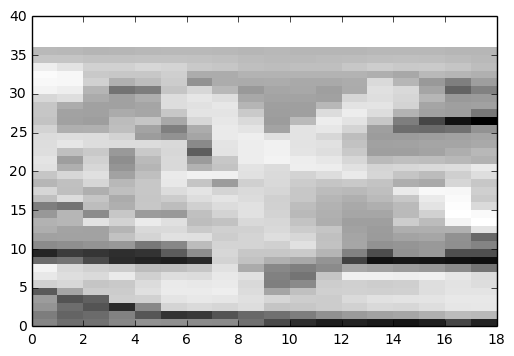

In [87]:
pcolor(training_data_peds[1000], cmap=plt.cm.gray_r)

# Example of Non-Ped Image

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


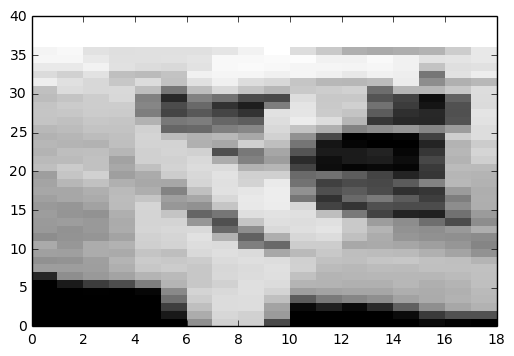

In [ ]:
pcolor(training_data_nonpeds[1000], cmap=plt.cm.gray_r)

# Reshape Image Arrays into Vectors

In [ ]:
reshaped_training_data_nonpeds = []
for array in training_data_nonpeds:
    array = np.reshape(array,shape(training_data_nonpeds)[1]*shape(training_data_nonpeds)[2])
    reshaped_training_data_nonpeds.append(array)

reshaped_training_data_peds = []
for array in training_data_nonpeds:
    array = np.reshape(array,shape(training_data_peds)[1]*shape(training_data_peds)[2])
    reshaped_training_data_peds.append(array)

In [ ]:
print (shape(reshaped_training_data_nonpeds))
print (shape(reshaped_training_data_peds))

# Add Labels to Images and Combine

In [ ]:
class TrainingDataFinal(object):

    def __init__(self,images,labels):
        self.images = images
        self.labels = labels
 


In [ ]:
images = np.concatenate((reshaped_training_data_nonpeds, reshaped_training_data_peds), axis=0)
labels =[]
label_ped = [0,1]
label_nonped = [1,0]
for image in reshaped_training_data_nonpeds:
    labels.append(label_nonped)
for image in reshaped_training_data_peds:
    labels.append(label_ped)
#labels = np.concatenate((zeros(len(reshaped_training_data_nonpeds)),ones(len(reshaped_training_data_peds))),axis=0)
labels = np.reshape(labels,(shape(labels)[0],shape(labels)[1]))
images = np.reshape(images,(shape(images)[0],shape(images)[1]))

print(shape(images))
print(shape(labels))


trainingdatafinal=TrainingDataFinal(images,labels)

In [ ]:
# Parameters
learning_rate = 0.001
training_iters = 20000
batch_size = 96
display_step = 10

# Network Parameters
n_input = 648 # MNIST data input (img shape: 28*28)
n_classes = 2 # MNIST total classes (0-9 digits)
dropout = 0.75 # Dropout, probability to keep units

# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)

In [ ]:
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases, dropout):
    # Reshape input picture
    x = tf.reshape(x, shape=[-1, 18, 36, 1])

    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)
    
    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)
    
    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    
    return out

In [ ]:
# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([3840, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = conv_net(x, weights, biases, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y[0:72]))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y[0:72], 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.initialize_all_variables()

# Import Testing Data

In [ ]:
testing_data_peds = []
testing_data_nonpeds = []

images = io.imread_collection('T1/ped_examples/*.pgm')
for (image, fn) in zip(images, images.files):
    testing_data_peds.append(image)
    
images = io.imread_collection('T1/non-ped_examples/*.pgm')
for (image, fn) in zip(images, images.files):
    testing_data_nonpeds.append(image)

print (shape(testing_data_peds))
print (shape(testing_data_nonpeds))

# Reshape Image Arrays into Vectors

In [ ]:
reshaped_testing_data_nonpeds = []
for array in testing_data_nonpeds:
    array = np.reshape(array,shape(testing_data_nonpeds)[1]*shape(testing_data_nonpeds)[2])
    reshaped_testing_data_nonpeds.append(array)

reshaped_testing_data_peds = []
for array in testing_data_nonpeds:
    array = np.reshape(array,shape(testing_data_peds)[1]*shape(testing_data_peds)[2])
    reshaped_testing_data_peds.append(array)

In [ ]:
print (shape(reshaped_training_data_nonpeds))
print (shape(reshaped_training_data_peds))

In [ ]:
class TestingDataFinal(object):

    def __init__(self,images,labels):
        self.images = images
        self.labels = labels
 


In [ ]:
images = np.concatenate((reshaped_testing_data_nonpeds, reshaped_testing_data_peds), axis=0)
labels =[]
label_ped = [0,1]
label_nonped = [1,0]
for image in reshaped_testing_data_nonpeds:
    labels.append(label_nonped)
for image in reshaped_testing_data_peds:
    labels.append(label_ped)
#labels = np.concatenate((zeros(len(reshaped_training_data_nonpeds)),ones(len(reshaped_training_data_peds))),axis=0)
labels = np.reshape(labels,(shape(labels)[0],shape(labels)[1]))
images = np.reshape(images,(shape(images)[0],shape(images)[1]))

print(shape(images))
print(shape(labels))


testingdatafinal=TestingDataFinal(images,labels)

In [76]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    step = 1
    # Keep training until reach max iterations
    batch_count_x = 0
    batch_count_y = 96
    while step * batch_size < training_iters:
        batch_x, batch_y = trainingdatafinal.images[0:96],trainingdatafinal.labels[0:96]
        batch_count_x += 96
        batch_count_y += 96
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y,
                                       keep_prob: dropout})
        if step % display_step == 0:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y,
                                                              keep_prob: 1.})
            print ("Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc))
        step += 1
    print ("Optimization Finished!")
    
    # Calculate accuracy for 256 mnist test images
    print ("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: testingdatafinal.images,
                                      y: testingdatafinal.labels,
                                      keep_prob: 1.}))

Iter 960, Minibatch Loss= 0.000000, Training Accuracy= 1.00000
Iter 1920, Minibatch Loss= 0.000000, Training Accuracy= 1.00000
Iter 2880, Minibatch Loss= 0.000000, Training Accuracy= 1.00000
Iter 3840, Minibatch Loss= 0.000000, Training Accuracy= 1.00000
Iter 4800, Minibatch Loss= 0.000000, Training Accuracy= 1.00000
Iter 5760, Minibatch Loss= 0.000000, Training Accuracy= 1.00000
Iter 6720, Minibatch Loss= 0.000000, Training Accuracy= 1.00000
Iter 7680, Minibatch Loss= 0.000000, Training Accuracy= 1.00000
Iter 8640, Minibatch Loss= 0.000000, Training Accuracy= 1.00000
Iter 9600, Minibatch Loss= 0.000000, Training Accuracy= 1.00000
Iter 10560, Minibatch Loss= 0.000000, Training Accuracy= 1.00000
Iter 11520, Minibatch Loss= 0.000000, Training Accuracy= 1.00000
Iter 12480, Minibatch Loss= 0.000000, Training Accuracy= 1.00000
Iter 13440, Minibatch Loss= 0.000000, Training Accuracy= 1.00000
Iter 14400, Minibatch Loss= 0.000000, Training Accuracy= 1.00000
Iter 15360, Minibatch Loss= 0.000000